# PLOTS OF TOWERS AND ISO DISTRIBUTIONS

This notebook takes as an input one of the following things:
* ROOT file containing the TTree of Tau events (SingleTau events are the best suited for teh purpose)
* ROOT file containing the TTree of QCD events
* DataFrame output of `towersIso4inspection.py`

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import ROOT
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)

import matplotlib
from matplotlib import pyplot as plt

Welcome to JupyROOT 6.14/04


In [2]:
dRiso = 0.8
list_dRsgn = [0.1,0.2,0.3,0.4,0.5]

In [3]:
def plotter( df,list_dRsgn, mode, off):
    fig = plt.figure(figsize = (10, 10))
    ax1 = fig.add_subplot(111)

    for dRsgn in list_dRsgn:
        ax1.hist(df['tower_{0}Sgn_dRsgn{1}'.format(mode,int(dRsgn*off))], label=r'tower_{0}Sgn_dRsgn{1}'.format(mode,dRsgn), histtype='step', lw=2)
    
    ax1.legend(loc = 'upper right', fontsize=15)
    ax1.set_xlabel(r'{0} inside the signal cone [GeV]'.format(mode), fontsize=15); ax1.set_ylabel('a.u.', fontsize=15)
    ax1.set_title('SingleTau noPU', fontsize=20)

    fig.show()

## RelValSingleTau

### Particular towers distributions

In [17]:
indir = '/data_cms_upgrade/motta/HGCAL_SKIMS/SKIM_12May2021'
rfile = ROOT.TFile.Open(indir+'/SKIM_RelValSingleTau_noPU/mergedOutput.root')
tree = rfile.Get('HGCALskimmedTree')

In [18]:
tree.GetEvent(10)

37762

In [19]:
tower_e = tree.tower_energy
tower_eta = tree.tower_eta
tower_phi = tree.tower_phi

tau_eta = tree.gentau_eta
tau_phi = tree.gentau_phi
tau_e = tree.gentau_energy

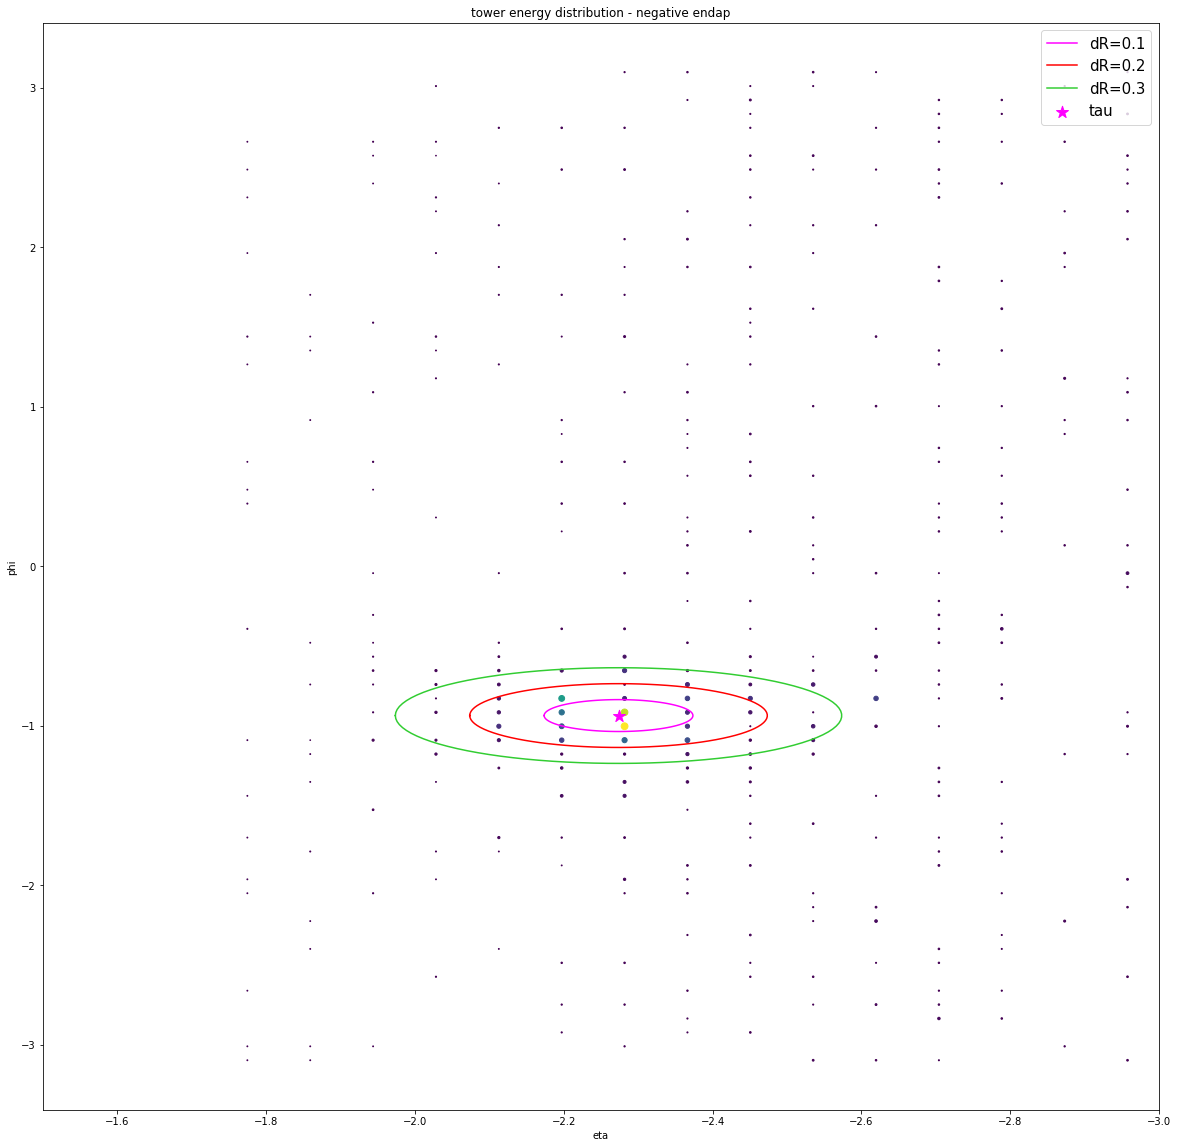

In [20]:
fig = plt.figure(figsize = (17, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

s = np.sqrt(tower_e)*10
c = tower_e

theta = np.linspace(0, 2*np.pi, 100)
r1 = 0.1
x1 = r1*np.cos(theta) + tau_eta 
y1 = r1*np.sin(theta) + tau_phi

r2 = 0.2
x2 = r2*np.cos(theta) + tau_eta 
y2 = r2*np.sin(theta) + tau_phi

r3 = 0.3
x3 = r3*np.cos(theta) + tau_eta 
y3 = r3*np.sin(theta) + tau_phi

ax1.scatter(tower_eta, tower_phi, c = c, s = s, marker = 'o')#, cmap = cmap)
ax1.scatter(tau_eta, tau_phi, marker='*', c='fuchsia', s=tau_e, label='tau')
ax1.plot(x1,y1,c='fuchsia', label='dR=0.1')
ax1.plot(x2,y2,c='red', label='dR=0.2')
ax1.plot(x3,y3,c='limegreen', label='dR=0.3')
ax1.set_xlabel('eta'); ax2.set_ylabel('phi')
#ax1.set_xlim(-1.8,-2.44)
#ax1.set_ylim(-1.70,-2.0)
ax1.set_xlim(-1.75,-3.0)
ax1.legend(loc = 'upper right', fontsize=15)
ax1.set_title('tower energy distribution - negative endap')

ax2.scatter(tower_eta, tower_phi, c = c, s = s, marker = 'o')#, cmap = cmap)
ax2.scatter(tau_eta, tau_phi, marker='*', c='fuchsia', s=tau_e, label='tau')
ax2.plot(x1,y1,c='fuchsia', label='dR=0.1')
ax2.plot(x2,y2,c='red', label='dR=0.2')
ax2.plot(x3,y3,c='limegreen', label='dR=0.3')
ax2.set_xlabel('eta'); ax2.set_ylabel('phi')
#ax2.set_xlim(2.025,2.125)
#ax2.set_ylim(1.5,1.65)
ax2.set_xlim(1.75,3.0)
ax2.legend(loc = 'upper right', fontsize=15)
ax2.set_title('tower energy distribution - positive endcap')

fig.show()

### eT distributions under different $\Delta$R Sgn hypotheses

In [ ]:
indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/hdf5dataframes/towers_studies_PU200'
name = 'threshold'

inFileTau_cl3d = {
    'threshold'    : indir+'/RelValSingleTau_PU200_th_matched.hdf5',
    'supertrigger' : indir+'/',
    'bestchoice'   : indir+'/',
    'bestcoarse'   : indir+'/',
    'mixed'        : indir+'/'
}

In [ ]:
store = pd.HDFStore(inFileTau_cl3d[name], mode='r')
dfTau = store[name]
store.close()

In [ ]:
plotter( dfTau,list_dRsgn, 'et', 10)

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)

ax1.hist(dfTau['tower_etIso_dRsgn1_dRiso8'], label=r'tower_etIso_dRsgn1_dRiso8', color='blue', histtype='step', lw=2)
ax1.hist(dfTau['tower_etIso_dRsgn2_dRiso8'], label=r'tower_etIso_dRsgn2_dRiso8', color='red', histtype='step', lw=2)
ax1.hist(dfTau['tower_etIso_dRsgn3_dRiso8'], label=r'tower_etIso_dRsgn3_dRiso8', color='green', histtype='step', lw=2)
ax1.hist(dfTau['tower_etIso_dRsgn4_dRiso8'], label=r'tower_etIso_dRsgn4_dRiso8', color='fuchsia', histtype='step', lw=2)
ax1.hist(dfTau['tower_etIso_dRsgn5_dRiso8'], label=r'tower_etIso_dRsgn5_dRiso8', color='cyan', histtype='step', lw=2)
ax1.legend(loc = 'upper right', fontsize=15)
ax1.set_xlabel(r'$E_{T}$ between the signal cone and the isolation cone [GeV]', fontsize=15); ax1.set_ylabel('a.u.', fontsize=15)
ax1.set_title('SingleTau noPU', fontsize=20)

fig.show()

### e distributions under different $\Delta$R Sgn hypotheses

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)

ax1.hist(dfTau['tower_eSgn_dRsgn1'], label=r'tower_eSgn_dRsgn1', color='blue', histtype='step', lw=2)
ax1.hist(dfTau['tower_eSgn_dRsgn2'], label=r'tower_eSgn_dRsgn2', color='red', histtype='step', lw=2)
ax1.hist(dfTau['tower_eSgn_dRsgn3'], label=r'tower_eSgn_dRsgn3', color='green', histtype='step', lw=2)
ax1.hist(dfTau['tower_eSgn_dRsgn4'], label=r'tower_eSgn_dRsgn4', color='fuchsia', histtype='step', lw=2)
ax1.hist(dfTau['tower_eSgn_dRsgn5'], label=r'tower_eSgn_dRsgn5', color='cyan', histtype='step', lw=2)
ax1.legend(loc = 'upper right', fontsize=15)
ax1.set_xlabel(r'$E$ inside the signal cone [GeV]', fontsize=15); ax1.set_ylabel('a.u.', fontsize=15)
ax1.set_title('SingleTau noPU', fontsize=20)

fig.show()

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)

ax1.hist(dfTau['tower_eIso_dRsgn1_dRiso8'], label=r'tower_eIso_dRsgn1_dRiso8', color='blue', histtype='step', lw=2)
ax1.hist(dfTau['tower_eIso_dRsgn2_dRiso8'], label=r'tower_eIso_dRsgn2_dRiso8', color='red', histtype='step', lw=2)
ax1.hist(dfTau['tower_eIso_dRsgn3_dRiso8'], label=r'tower_eIso_dRsgn3_dRiso8', color='green', histtype='step', lw=2)
ax1.hist(dfTau['tower_eIso_dRsgn4_dRiso8'], label=r'tower_eIso_dRsgn4_dRiso8', color='fuchsia', histtype='step', lw=2)
ax1.hist(dfTau['tower_eIso_dRsgn5_dRiso8'], label=r'tower_eIso_dRsgn5_dRiso8', color='cyan', histtype='step', lw=2)
ax1.legend(loc = 'upper right', fontsize=15)
ax1.set_xlabel(r'$E$ between the signal cone and the isolation cone [GeV]', fontsize=15); ax1.set_ylabel('a.u.', fontsize=15)
ax1.set_title('SingleTau noPU', fontsize=20)

fig.show()

### eT EM-HAD distributions under different $\Delta$R Sgn hypotheses

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)

ax1.hist(dfTau['tower_etEmIso_dRsgn1_dRiso8'], label=r'tower_etEmIso_dRsgn1_dRiso8', color='blue', histtype='step', lw=2)
ax1.hist(dfTau['tower_etEmIso_dRsgn2_dRiso8'], label=r'tower_etEmIso_dRsgn2_dRiso8', color='red', histtype='step', lw=2)
ax1.hist(dfTau['tower_etEmIso_dRsgn3_dRiso8'], label=r'tower_etEmIso_dRsgn3_dRiso8', color='green', histtype='step', lw=2)
ax1.hist(dfTau['tower_etEmIso_dRsgn4_dRiso8'], label=r'tower_etEmIso_dRsgn4_dRiso8', color='fuchsia', histtype='step', lw=2)
ax1.hist(dfTau['tower_etEmIso_dRsgn5_dRiso8'], label=r'tower_etEmIso_dRsgn5_dRiso8', color='cyan', histtype='step', lw=2)
ax1.legend(loc = 'upper right', fontsize=15)
ax1.set_xlabel(r'$E_{T}^{em}$ inside the signal cone [GeV]', fontsize=15); ax1.set_ylabel('a.u.', fontsize=15)
ax1.set_title('SingleTau noPU', fontsize=20)

fig.show()

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)

ax1.hist(dfTau['tower_etHadIso_dRsgn1_dRiso8'], label=r'tower_etHadIso_dRsgn1_dRiso8', color='blue', histtype='step', lw=2)
ax1.hist(dfTau['tower_etHadIso_dRsgn2_dRiso8'], label=r'tower_etHadIso_dRsgn2_dRiso8', color='red', histtype='step', lw=2)
ax1.hist(dfTau['tower_etHadIso_dRsgn3_dRiso8'], label=r'tower_etHadIso_dRsgn3_dRiso8', color='green', histtype='step', lw=2)
ax1.hist(dfTau['tower_etHadIso_dRsgn4_dRiso8'], label=r'tower_etHadIso_dRsgn4_dRiso8', color='fuchsia', histtype='step', lw=2)
ax1.hist(dfTau['tower_etHadIso_dRsgn5_dRiso8'], label=r'tower_etHadIso_dRsgn5_dRiso8', color='cyan', histtype='step', lw=2)
ax1.legend(loc = 'upper right', fontsize=15)
ax1.set_xlabel(r'$E_{T}^{had}$ between the signal cone and the isolation cone [GeV]', fontsize=15); ax1.set_ylabel('a.u.', fontsize=15)
ax1.set_title('SingleTau noPU', fontsize=20)

fig.show()

## RelValQCD

### Particular towers distributions

In [ ]:
indir = '/data_cms_upgrade/motta/HGCAL_SKIMS/SKIM_12May2021'
rfile = ROOT.TFile.Open(indir+'/SKIM_RelValQCD_PU200/mergedOutput.root')
tree = rfile.Get('HGCALskimmedTree')

In [ ]:
tree.GetEvent(1112)
print(tree.genjet_n)

In [ ]:
tower_e = tree.tower_energy
tower_eta = tree.tower_eta
tower_phi = tree.tower_phi

jet_eta = tree.genjet_eta
jet_phi = tree.genjet_phi
jet_e = tree.genjet_energy

In [ ]:
fig = plt.figure(figsize = (17, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

s = np.sqrt(tower_e)*10
c = tower_e

theta = np.linspace(0, 2*np.pi, 100)
r1 = 0.1
x1 = r1*np.cos(theta) + jet_eta 
y1 = r1*np.sin(theta) + jet_phi

r2 = 0.2
x2 = r2*np.cos(theta) + jet_eta 
y2 = r2*np.sin(theta) + jet_phi

r3 = 0.3
x3 = r3*np.cos(theta) + jet_eta 
y3 = r3*np.sin(theta) + jet_phi

ax1.scatter(tower_eta, tower_phi, c = c, s = s, marker = 'o')#, cmap = cmap)
ax1.scatter(jet_eta, jet_phi, marker='*', c='fuchsia', s=np.sqrt(jet_e)*5, label='QCD jet')
ax1.plot(x1,y1,c='fuchsia', label='dR=0.1')
ax1.plot(x2,y2,c='red', label='dR=0.2')
ax1.plot(x3,y3,c='limegreen', label='dR=0.3')
ax1.set_xlabel('eta'); ax1.set_ylabel('phi')
ax1.set_xlim(-1.5,-3.0)
#ax1.set_ylim(0.0,2.0)
ax1.legend(loc = 'upper right', fontsize=15)
ax1.set_title('tower energy distribution - negative endap')

ax2.scatter(tower_eta, tower_phi, c = c, s = s, marker = 'o')#, cmap = cmap)
ax2.scatter(jet_eta, jet_phi, marker='*', c='fuchsia', s=np.sqrt(jet_e)*5, label='QCD jet')
ax2.plot(x1,y1,c='fuchsia', label='dR=0.1')
ax2.plot(x2,y2,c='red', label='dR=0.2')
ax2.plot(x3,y3,c='limegreen', label='dR=0.3')
ax2.set_xlabel('eta'); ax2.set_ylabel('phi')
#ax2.set_xlim(2,2.6)
#ax2.set_ylim(-1.5,-3.0)
ax2.set_xlim(1.5,3.0)
ax2.legend(loc = 'upper right', fontsize=15)
ax2.set_title('tower energy distribution - positive endcap')

fig.show()

### eT distributions under different $\Delta$R Sgn hypotheses

In [ ]:
indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/hdf5dataframes/towers_studies_PU200'
name = 'threshold'

inFileQCD_cl3d = {
    'threshold'    : indir+'/RelValQCD_PU200_th_matched.hdf5',
    'supertrigger' : indir+'/',
    'bestchoice'   : indir+'/',
    'bestcoarse'   : indir+'/',
    'mixed'        : indir+'/'
}

In [ ]:
store = pd.HDFStore(inFileQCD_cl3d[name], mode='r')
dfQCD = store[name]
store.close()

In [ ]:
bins = np.arange(0,600,50)

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)

ax1.hist(dfQCD['tower_etSgn_dRsgn1'], label=r'tower_etSgn_dRsgn1', color='blue', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_etSgn_dRsgn2'], label=r'tower_etSgn_dRsgn2', color='red', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_etSgn_dRsgn3'], label=r'tower_etSgn_dRsgn3', color='green', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_etSgn_dRsgn4'], label=r'tower_etSgn_dRsgn4', color='fuchsia', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_etSgn_dRsgn5'], label=r'tower_etSgn_dRsgn5', color='cyan', histtype='step', lw=2, bins=bins)
ax1.legend(loc = 'upper right', fontsize=15)
ax1.set_xlabel(r'$E_{T}$ inside the signal cone [GeV]', fontsize=15); ax1.set_ylabel('a.u.', fontsize=15)
ax1.set_title('QCD noPU', fontsize=20)

fig.show()

In [ ]:
bins = np.arange(0,200,5)

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)

ax1.hist(dfQCD['tower_etIso_dRsgn1_dRiso8'], label=r'tower_etIso_dRsgn1_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_etIso_dRsgn2_dRiso8'], label=r'tower_etIso_dRsgn2_dRiso8', color='red', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_etIso_dRsgn3_dRiso8'], label=r'tower_etIso_dRsgn3_dRiso8', color='green', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_etIso_dRsgn4_dRiso8'], label=r'tower_etIso_dRsgn4_dRiso8', color='fuchsia', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_etIso_dRsgn5_dRiso8'], label=r'tower_etIso_dRsgn5_dRiso8', color='cyan', histtype='step', lw=2, bins=bins)
ax1.legend(loc = 'upper right', fontsize=15)
ax1.set_xlabel(r'$E_{T}$ between the signal cone and the isolation cone [GeV]', fontsize=15); ax1.set_ylabel('a.u.', fontsize=15)
ax1.set_title('QCD noPU', fontsize=20)

fig.show()

### e distributions under different $\Delta$R Sgn hypotheses

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)

ax1.hist(dfQCD['tower_eSgn_dRsgn1'], label=r'tower_eSgn_dRsgn1', color='blue', histtype='step', lw=2)
ax1.hist(dfQCD['tower_eSgn_dRsgn2'], label=r'tower_eSgn_dRsgn2', color='red', histtype='step', lw=2)
ax1.hist(dfQCD['tower_eSgn_dRsgn3'], label=r'tower_eSgn_dRsgn3', color='green', histtype='step', lw=2)
ax1.hist(dfQCD['tower_eSgn_dRsgn4'], label=r'tower_eSgn_dRsgn4', color='fuchsia', histtype='step', lw=2)
ax1.hist(dfQCD['tower_eSgn_dRsgn5'], label=r'tower_eSgn_dRsgn5', color='cyan', histtype='step', lw=2)
ax1.legend(loc = 'upper right', fontsize=15)
ax1.set_xlabel(r'$E$ inside the signal cone [GeV]', fontsize=15); ax1.set_ylabel('a.u.', fontsize=15)
ax1.set_title('QCD noPU', fontsize=20)

fig.show()

In [ ]:
bins = np.arange(0,200,5)

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)

ax1.hist(dfQCD['tower_eIso_dRsgn1_dRiso8'], label=r'tower_eIso_dRsgn1_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_eIso_dRsgn2_dRiso8'], label=r'tower_eIso_dRsgn2_dRiso8', color='red', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_eIso_dRsgn3_dRiso8'], label=r'tower_eIso_dRsgn3_dRiso8', color='green', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_eIso_dRsgn4_dRiso8'], label=r'tower_eIso_dRsgn4_dRiso8', color='fuchsia', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_eIso_dRsgn5_dRiso8'], label=r'tower_eIso_dRsgn5_dRiso8', color='cyan', histtype='step', lw=2, bins=bins)
ax1.legend(loc = 'upper right', fontsize=15)
ax1.set_xlabel(r'$E$ between the signal cone and the isolation cone [GeV]', fontsize=15); ax1.set_ylabel('a.u.', fontsize=15)
ax1.set_title('QCD noPU', fontsize=20)

fig.show()

### eT EM-HAD distributions under different $\Delta$R Sgn hypotheses

In [ ]:
bins = np.arange(0,200,5)

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)

ax1.hist(dfQCD['tower_etEmIso_dRsgn1_dRiso8'], label=r'tower_etEmIso_dRsgn1_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_etEmIso_dRsgn2_dRiso8'], label=r'tower_etEmIso_dRsgn2_dRiso8', color='red', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_etEmIso_dRsgn3_dRiso8'], label=r'tower_etEmIso_dRsgn3_dRiso8', color='green', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_etEmIso_dRsgn4_dRiso8'], label=r'tower_etEmIso_dRsgn4_dRiso8', color='fuchsia', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_etEmIso_dRsgn5_dRiso8'], label=r'tower_etEmIso_dRsgn5_dRiso8', color='cyan', histtype='step', lw=2, bins=bins)
ax1.legend(loc = 'upper right', fontsize=15)
ax1.set_xlabel(r'$E_{T}^{em}$ inside the signal cone [GeV]', fontsize=15); ax1.set_ylabel('a.u.', fontsize=15)
ax1.set_title('QCD noPU', fontsize=20)

fig.show()

In [ ]:
bins = np.arange(0,200,5)

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)

ax1.hist(dfQCD['tower_etHadIso_dRsgn1_dRiso8'], label=r'tower_etHadIso_dRsgn1_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_etHadIso_dRsgn2_dRiso8'], label=r'tower_etHadIso_dRsgn2_dRiso8', color='red', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_etHadIso_dRsgn3_dRiso8'], label=r'tower_etHadIso_dRsgn3_dRiso8', color='green', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_etHadIso_dRsgn4_dRiso8'], label=r'tower_etHadIso_dRsgn4_dRiso8', color='fuchsia', histtype='step', lw=2, bins=bins)
ax1.hist(dfQCD['tower_etHadIso_dRsgn5_dRiso8'], label=r'tower_etHadIso_dRsgn5_dRiso8', color='cyan', histtype='step', lw=2, bins=bins)
ax1.legend(loc = 'upper right', fontsize=15)
ax1.set_xlabel(r'$E_{T}^{had}$ between the signal cone and the isolation cone [GeV]', fontsize=15); ax1.set_ylabel('a.u.', fontsize=15)
ax1.set_title('QCD noPU', fontsize=20)

fig.show()

## Overlayed RelValSingleTau - RelValQCD 

### eT overlayed distributions under different $\Delta$R Sgn hypotheses

In [ ]:
step = 2
bins = np.arange(0,100,step)

fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)

tau, _, _ = ax1.hist(dfTau['tower_etIso_dRsgn1_dRiso8'], label=r'Tau tower_etIso_dRsgn1_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax1.hist(dfQCD['tower_etIso_dRsgn1_dRiso8'], label=r'QCD tower_etIso_dRsgn1_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax1.vlines(cut, 0, 200, color='black', lw=2)
ax1.text(40,150,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax1.legend(loc = 'upper right', fontsize=15)
ax1.set_xlabel(r'$E_{T}$ between the signal cone and the isolation cone [GeV]'); ax1.set_ylabel('a.u.')
ax1.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.1')

tau, _, _ = ax2.hist(dfTau['tower_etIso_dRsgn2_dRiso8'], label=r'Tau tower_etIso_dRsgn2_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax2.hist(dfQCD['tower_etIso_dRsgn2_dRiso8'], label=r'QCD tower_etIso_dRsgn2_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax2.vlines(cut, 0, 400, color='black', lw=2)
ax2.text(40,400,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax2.legend(loc = 'upper right', fontsize=15)
ax2.set_xlabel(r'$E_{T}$ between the signal cone and the isolation cone [GeV]'); ax1.set_ylabel('a.u.')
ax2.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.2')

tau, _, _ = ax3.hist(dfTau['tower_etIso_dRsgn3_dRiso8'], label=r'Tau tower_etIso_dRsgn3_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax3.hist(dfQCD['tower_etIso_dRsgn3_dRiso8'], label=r'QCD tower_etIso_dRsgn3_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax3.vlines(cut, 0, 600, color='black', lw=2)
ax3.text(40,600,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax3.legend(loc = 'upper right', fontsize=15)
ax3.set_xlabel(r'$E_{T}$ between the signal cone and the isolation cone [GeV]'); ax1.set_ylabel('a.u.')
ax3.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.3')

tau, _, _ = ax4.hist(dfTau['tower_etIso_dRsgn4_dRiso8'], label=r'Tau tower_etIso_dRsgn4_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax4.hist(dfQCD['tower_etIso_dRsgn4_dRiso8'], label=r'QCD tower_etIso_dRsgn4_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax4.vlines(cut, 0, 750, color='black', lw=2)
ax4.text(40,750,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax4.legend(loc = 'upper right', fontsize=15)
ax4.set_xlabel(r'$E_{T}$ between the signal cone and the isolation cone cone [GeV]'); ax1.set_ylabel('a.u.')
ax4.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.4')

tau, _, _ = ax5.hist(dfTau['tower_etIso_dRsgn5_dRiso8'], label=r'Tau tower_etIso_dRsgn5_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax5.hist(dfQCD['tower_etIso_dRsgn5_dRiso8'], label=r'QCD tower_etIso_dRsgn5_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax5.vlines(cut, 0, 1000, color='black', lw=2)
ax5.text(40,1000,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax5.legend(loc = 'upper right', fontsize=15)
ax5.set_xlabel(r'$E_{T}$ between the signal cone and the isolation cone [GeV]'); ax1.set_ylabel('a.u.')
ax5.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.5')

fig.show()

### e overlayed distributions under different $\Delta$R Sgn hypotheses

In [ ]:
step = 2
bins = np.arange(0,200,step)

fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)

tau, _, _ = ax1.hist(dfTau['tower_eIso_dRsgn1_dRiso8'], label=r'Tau tower_eIso_dRsgn1_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax1.hist(dfQCD['tower_eIso_dRsgn1_dRiso8'], label=r'QCD tower_eIso_dRsgn1_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax1.vlines(cut, 0, 40, color='black', lw=2)
ax1.text(100,40,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax1.legend(loc = 'upper right', fontsize=15)
ax1.set_xlabel(r'$E$ between the signal cone and the isolation cone [GeV]'); ax1.set_ylabel('a.u.')
ax1.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.1')

tau, _, _ = ax2.hist(dfTau['tower_eIso_dRsgn2_dRiso8'], label=r'Tau tower_eIso_dRsgn2_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax2.hist(dfQCD['tower_eIso_dRsgn2_dRiso8'], label=r'QCD tower_eIso_dRsgn2_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax2.vlines(cut, 0, 60, color='black', lw=2)
ax2.text(100,60,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax2.legend(loc = 'upper right', fontsize=15)
ax2.set_xlabel(r'$E$ between the signal cone and the isolation cone [GeV]'); ax1.set_ylabel('a.u.')
ax2.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.2')

tau, _, _ = ax3.hist(dfTau['tower_eIso_dRsgn3_dRiso8'], label=r'Tau tower_eIso_dRsgn3_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax3.hist(dfQCD['tower_eIso_dRsgn3_dRiso8'], label=r'QCD tower_eIso_dRsgn3_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax3.vlines(cut, 0, 100, color='black', lw=2)
ax3.text(100,100,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax3.legend(loc = 'upper right', fontsize=15)
ax3.set_xlabel(r'$E$ between the signal cone and the isolation cone [GeV]'); ax1.set_ylabel('a.u.')
ax3.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.3')

tau, _, _ = ax4.hist(dfTau['tower_eIso_dRsgn4_dRiso8'], label=r'Tau tower_eIso_dRsgn4_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax4.hist(dfQCD['tower_eIso_dRsgn4_dRiso8'], label=r'QCD tower_eIso_dRsgn4_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax4.vlines(cut, 0, 200, color='black', lw=2)
ax4.text(100,200,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax4.legend(loc = 'upper right', fontsize=15)
ax4.set_xlabel(r'$E$ between the signal cone and the isolation cone[GeV]'); ax1.set_ylabel('a.u.')
ax4.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.4')

tau, _, _ = ax5.hist(dfTau['tower_eIso_dRsgn5_dRiso8'], label=r'Tau tower_eIso_dRsgn5_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax5.hist(dfQCD['tower_eIso_dRsgn5_dRiso8'], label=r'QCD tower_eIso_dRsgn5_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax5.vlines(cut, 0, 400, color='black', lw=2)
ax5.text(100,400,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax5.legend(loc = 'upper right', fontsize=15)
ax5.set_xlabel(r'$E$ between the signal cone and the isolation cone [GeV]'); ax1.set_ylabel('a.u.')
ax5.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.5')

fig.show()

### eT EM-HAD overlayed distributions under different $\Delta$R Sgn hypotheses

In [ ]:
step = 2
bins = np.arange(0,100,step)

fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)

tau, _, _ = ax1.hist(dfTau['tower_etEmIso_dRsgn1_dRiso8'], label=r'Tau tower_etEmIs0_dRsgn1_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax1.hist(dfQCD['tower_etEmIso_dRsgn1_dRiso8'], label=r'QCD tower_etEmIs0_dRsgn1_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax1.vlines(cut, 0, 300, color='black', lw=2)
ax1.text(40,300,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax1.legend(loc = 'upper right', fontsize=15)
ax1.set_xlabel(r'$E_{T}^{em}$ between the signal cone and the isolation cone [GeV]'); ax1.set_ylabel('a.u.')
ax1.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.1')

tau, _, _ = ax2.hist(dfTau['tower_etEmIso_dRsgn2_dRiso8'], label=r'Tau tower_etEmIs0_dRsgn2_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax2.hist(dfQCD['tower_etEmIso_dRsgn2_dRiso8'], label=r'QCD tower_etEmIs0_dRsgn2_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax2.vlines(cut, 0, 800, color='black', lw=2)
ax2.text(40,800,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax2.legend(loc = 'upper right', fontsize=15)
ax2.set_xlabel(r'$E_{T}^{em}$ between the signal cone and the isolation cone [GeV]'); ax1.set_ylabel('a.u.')
ax2.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.2')

tau, _, _ = ax3.hist(dfTau['tower_etEmIso_dRsgn3_dRiso8'], label=r'Tau tower_etEmIs0_dRsgn3_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax3.hist(dfQCD['tower_etEmIso_dRsgn3_dRiso8'], label=r'QCD tower_etEmIs0_dRsgn3_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax3.vlines(cut, 0, 1000, color='black', lw=2)
ax3.text(40,1000,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax3.legend(loc = 'upper right', fontsize=15)
ax3.set_xlabel(r'$E_{T}^{em}$ between the signal cone and the isolation cone [GeV]'); ax1.set_ylabel('a.u.')
ax3.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.3')

tau, _, _ = ax4.hist(dfTau['tower_etEmIso_dRsgn4_dRiso8'], label=r'Tau tower_etEmIs0_dRsgn4_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax4.hist(dfQCD['tower_etEmIso_dRsgn4_dRiso8'], label=r'QCD tower_etEmIs0_dRsgn4_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax4.vlines(cut, 0, 1000, color='black', lw=2)
ax4.text(40,1000,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax4.legend(loc = 'upper right', fontsize=15)
ax4.set_xlabel(r'$E_{T}^{em}$ between the signal cone and the isolation cone cone [GeV]'); ax1.set_ylabel('a.u.')
ax4.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.4')

tau, _, _ = ax5.hist(dfTau['tower_etEmIso_dRsgn5_dRiso8'], label=r'Tau tower_etEmIs0_dRsgn5_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax5.hist(dfQCD['tower_etEmIso_dRsgn5_dRiso8'], label=r'QCD tower_etEmIs0_dRsgn5_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax5.vlines(cut, 0, 1000, color='black', lw=2)
ax5.text(40,1000,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax5.legend(loc = 'upper right', fontsize=15)
ax5.set_xlabel(r'$E_{T}^{em}$ between the signal cone and the isolation cone [GeV]'); ax1.set_ylabel('a.u.')
ax5.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.5')

fig.show()

In [ ]:
step = 2
bins = np.arange(0,100,step)

fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)

tau, _, _ = ax1.hist(dfTau['tower_etHadIso_dRsgn1_dRiso8'], label=r'Tau tower_etHadIso_dRsgn1_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax1.hist(dfQCD['tower_etHadIso_dRsgn1_dRiso8'], label=r'QCD tower_etHadIso_dRsgn1_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax1.vlines(cut, 0, 250, color='black', lw=2)
ax1.text(40,250,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax1.legend(loc = 'upper right', fontsize=15)
ax1.set_xlabel(r'$E_{T}^{had}$ between the signal cone and the isolation cone [GeV]'); ax1.set_ylabel('a.u.')
ax1.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.1')

tau, _, _ = ax2.hist(dfTau['tower_etHadIso_dRsgn2_dRiso8'], label=r'Tau tower_etHadIso_dRsgn2_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax2.hist(dfQCD['tower_etHadIso_dRsgn2_dRiso8'], label=r'QCD tower_etHadIso_dRsgn2_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax2.vlines(cut, 0, 400, color='black', lw=2)
ax2.text(40,400,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax2.legend(loc = 'upper right', fontsize=15)
ax2.set_xlabel(r'$E_{T}^{had}$ between the signal cone and the isolation cone [GeV]'); ax1.set_ylabel('a.u.')
ax2.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.2')

tau, _, _ = ax3.hist(dfTau['tower_etHadIso_dRsgn3_dRiso8'], label=r'Tau tower_etHadIso_dRsgn3_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax3.hist(dfQCD['tower_etHadIso_dRsgn3_dRiso8'], label=r'QCD tower_etHadIso_dRsgn3_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax3.vlines(cut, 0, 1000, color='black', lw=2)
ax3.text(40,1000,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax3.legend(loc = 'upper right', fontsize=15)
ax3.set_xlabel(r'$E_{T}^{had}$ between the signal cone and the isolation cone [GeV]'); ax1.set_ylabel('a.u.')
ax3.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.3')

tau, _, _ = ax4.hist(dfTau['tower_etHadIso_dRsgn4_dRiso8'], label=r'Tau tower_etHadIso_dRsgn4_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax4.hist(dfQCD['tower_etHadIso_dRsgn4_dRiso8'], label=r'QCD tower_etHadIso_dRsgn4_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax4.vlines(cut, 0, 1000, color='black', lw=2)
ax4.text(40,1000,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax4.legend(loc = 'upper right', fontsize=15)
ax4.set_xlabel(r'$E_{T}^{had}$ between the signal cone and the isolation cone cone [GeV]'); ax1.set_ylabel('a.u.')
ax4.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.4')

tau, _, _ = ax5.hist(dfTau['tower_etHadIso_dRsgn5_dRiso8'], label=r'Tau tower_etHadIso_dRsgn5_dRiso8', color='blue', histtype='step', lw=2, bins=bins)
qcd, _, _ = ax5.hist(dfQCD['tower_etHadIso_dRsgn5_dRiso8'], label=r'QCD tower_etHadIso_dRsgn5_dRiso8', color='red', histtype='step', lw=2, bins=bins)
cut = 0
tau_pass = 0
qcd_pass = 0
for i in range(len(tau)):
    tau_pass += tau[i]
    qcd_pass += qcd[i]
    if qcd[i] > tau[i]:
        break
    cut += step
ax5.vlines(cut, 0, 1000, color='black', lw=2)
ax5.text(40,1000,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau),2), round(float(qcd_pass)/np.sum(qcd),2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd)),2)), fontsize=15)
ax5.legend(loc = 'upper right', fontsize=15)
ax5.set_xlabel(r'$E_{T}^{had}$ between the signal cone and the isolation cone [GeV]'); ax1.set_ylabel('a.u.')
ax5.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.5')

fig.show()

In [ ]:
bins = np.arange(0,50,2)

fig = plt.figure(figsize = (20, 9))
ax2 = fig.add_subplot(121)
ax3 = fig.add_subplot(122)

ax2.hist(dfTau['tower_etIso_dRsgn0.2_dRiso0.8'], label=r'Tau tower_etSgn_dRsgn0.2_dRiso0.8', color='blue', histtype='step', lw=2, bins=bins)
ax2.hist(dfQCD['tower_etIso_dRsgn0.2_dRiso0.8'], label=r'QCD tower_etSgn_dRsgn0.2_dRiso0.8', color='red', histtype='step', lw=2, bins=bins)
ax2.legend(loc = 'upper right', fontsize=15)
ax2.set_xlabel(r'$E_{T}$ inside the isolation cone [GeV]'); ax1.set_ylabel('a.u.')
ax2.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.2')

ax3.hist(dfTau['tower_etIso_dRsgn0.3_dRiso0.8'], label=r'Tau tower_etSgn_dRsgn0.3_dRiso0.8', color='blue', histtype='step', lw=2, bins=bins)
ax3.hist(dfQCD['tower_etIso_dRsgn0.3_dRiso0.8'], label=r'QCD tower_etSgn_dRsgn0.3_dRiso0.8', color='red', histtype='step', lw=2, bins=bins)
ax3.legend(loc = 'upper right', fontsize=15)
ax3.set_xlabel(r'$E_{T}$ inside the isolation cone [GeV]'); ax1.set_ylabel('a.u.')
ax3.set_title('Overlay of SingleTau noPU and QCD noPU - $\Delta$Rsgn=0.3')

fig.show()